In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import json
import csv

In [11]:
dataset = '/content/drive/MyDrive/dataset.json'

In [12]:
data = []
with open(dataset, 'r') as json_file:
    for line in json_file:
        try:
            obj = json.loads(line.strip())
            data.append(obj)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

In [13]:
csv_file_path = '/content/drive/MyDrive/dataset.csv'

In [14]:
fieldnames = list(data[0].keys())

In [ ]:
with open(csv_file_path, 'w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # 写入列名
    writer.writeheader()

    # 写入数据
    writer.writerows(data)

In [ ]:
import csv

def merge_users_data(csv_file_path, target_user_ids, output_file_path):
    with open(csv_file_path, 'r', newline='') as csv_file:
        reader = csv.DictReader(csv_file)

        user_data_to_merge = []
        for row in reader:
            user_id = int(row['user'])
            if user_id in target_user_ids:
                user_data_to_merge.append(row)

    with open(output_file_path, 'w', newline='') as output_file:
        fieldnames = user_data_to_merge[0].keys()
        writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(user_data_to_merge)


In [ ]:
csv_file_path = '/content/drive/MyDrive/dataset.csv'
target_user_ids = [2, 3, 6, 8, 9, 11, 14, 42, 46, 50, 58]  # 要提取的目标用户ID列表
output_file_path = '/content/drive/MyDrive/dataset_high_performing.csv'  # 合并后保存为新的CSV文件
merge_users_data(csv_file_path, target_user_ids, output_file_path)

In [ ]:
csv_file_path = '/content/drive/MyDrive/dataset.csv'
target_user_ids = [1, 4, 5, 7, 10, 13, 16, 19, 20, 25, 27, 28, 29, 30, 31,
32, 33, 34, 37, 39, 40, 41, 43, 45, 47, 49, 51, 52]  # 要提取的目标用户ID列表
output_file_path = '/content/drive/MyDrive/dataset_low_performing.csv'  # 合并后保存为新的CSV文件
merge_users_data(csv_file_path, target_user_ids, output_file_path)

In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UQ/dataset.csv')
#提取'action'列中的参数
actions = data['action']
all_actions = ' '.join(actions)  # 将所有参数合并成一个字符串

# 将分词结果转换为空格分隔的字符串
seg_result = ' '.join(all_actions)

# Step 4: 构建词云
wordcloud = WordCloud(width=1600, height=800, background_color='white',collocations=False).generate(all_actions)

# 可视化词云
plt.figure(figsize=(10, 5),dpi = 1200)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
 wordcloud.to_file('/content/drive/MyDrive/wordcloud_high.png')

In [17]:
data = pd.read_csv('/content/drive/MyDrive/dataset_low_performing.csv')
#提取'action'列中的参数
actions = data['action']
all_actions = ' '.join(actions)  # 将所有参数合并成一个字符串

# 将分词结果转换为空格分隔的字符串
seg_result = ' '.join(word_list)

# Step 4: 构建词云
wordcloud = WordCloud(width=1600, height=800, background_color='white',collocations=False).generate(all_actions)

# 可视化词云
plt.figure(figsize=(10, 5),dpi = 1200)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: ignored

In [ ]:
 wordcloud.to_file('/content/drive/MyDrive/wordcloud_low.png')

In [ ]:
from collections import Counter

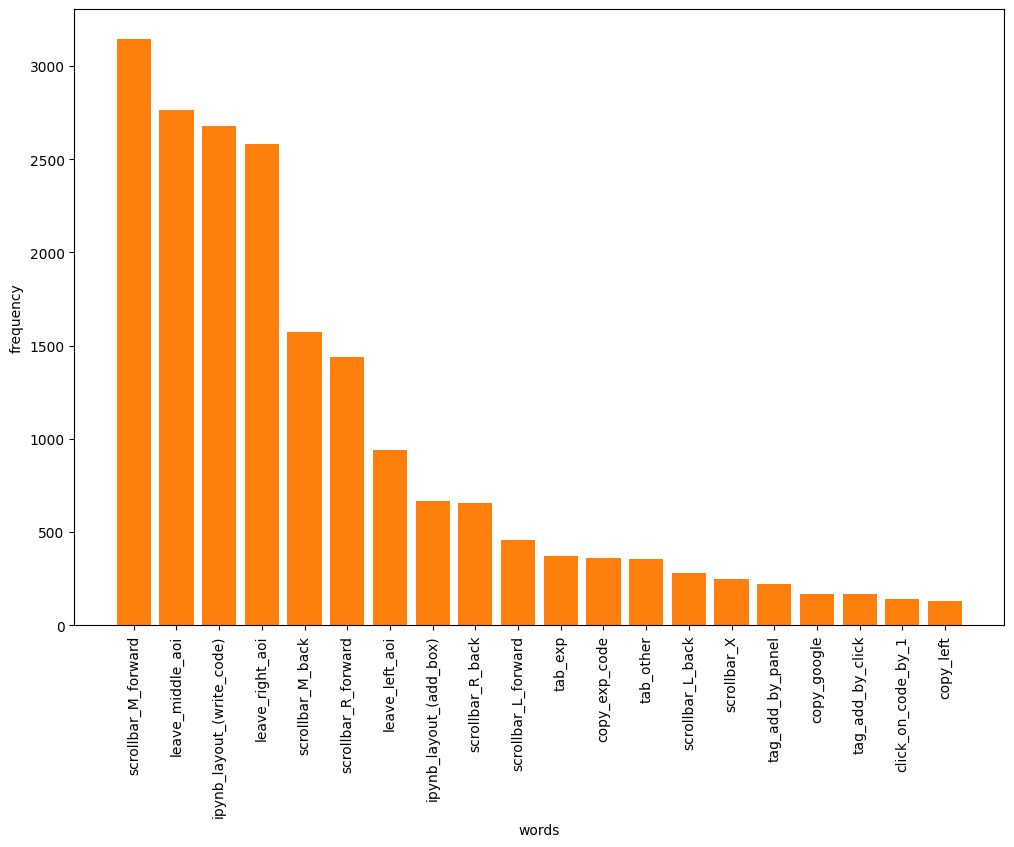

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Step 1: 读取CSV数据集
data = pd.read_csv('/content/drive/MyDrive/dataset_high_performing.csv')

# Step 2: 提取'action'列中的参数并进行预处理
actions = data['action']

# Step 3: 计算每个单词的词频
word_freq = Counter(actions)

# Step 4: 绘制词频统计柱状图
# 取前20个最高频的单词
top_words = word_freq.most_common(20)

# 分离单词和频次
words, frequencies = zip(*top_words)

# 绘制柱状图
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, width=0.6)
plt.bar(words, frequencies)
plt.xlabel('words')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.savefig('/content/drive/MyDrive/word_freq_high.png', dpi=600)

<Figure size 640x480 with 0 Axes>

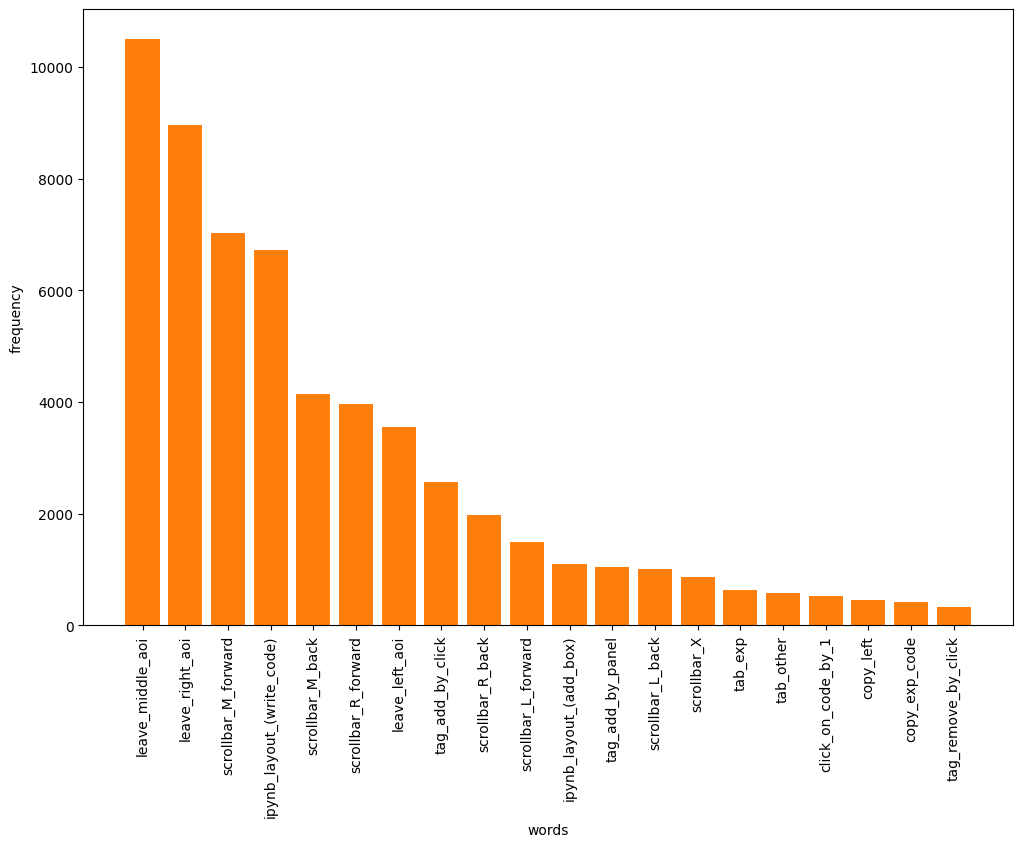

In [ ]:
# Step 1: 读取CSV数据集
data = pd.read_csv('/content/drive/MyDrive/dataset_low_performing.csv')

# Step 2: 提取'action'列中的参数并进行预处理
actions = data['action']

# Step 3: 计算每个单词的词频
word_freq = Counter(actions)

# Step 4: 绘制词频统计柱状图
# 取前20个最高频的单词
top_words = word_freq.most_common(20)

# 分离单词和频次
words, frequencies = zip(*top_words)

# 绘制柱状图
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies, width=0.6)
plt.bar(words, frequencies)
plt.xlabel('words')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.savefig('/content/drive/MyDrive/word_freq_low.png', dpi=600)

<Figure size 640x480 with 0 Axes>